# Projeto: Classificação de Níveis de Vício em Celular usando SVM

## Objetivo
Desenvolver um modelo de Support Vector Machine (SVM) para classificar níveis de vício em celular entre adolescentes, aplicando técnicas de validação cruzada e otimização de hiperparâmetros.

| Column Name               | Descrição                                                                 |
|----------------------------|---------------------------------------------------------------------------|
| **Age**                    | Idade do participante (em anos)                                           |
| **Gender**                 | Identidade de gênero do participante                                      |
| **Time_on_Social_Media**   | Tempo médio diário gasto em redes sociais (em horas)                      |
| **Time_on_Education**      | Tempo diário dedicado a estudo/aprendizado (em horas)                     |
| **Time_on_Gaming**         | Tempo diário dedicado a jogos eletrônicos (em horas)                      |
| **Phone_Checks_Per_Day**   | Quantidade de vezes que o participante verifica o celular por dia          |
| **Phone_Usage_Purpose**    | Finalidade principal do uso do celular (ex.: social, jogos, educação etc.) |
| **Exercise_Hours**         | Quantidade de horas de atividade física por semana                        |
| **Academic_Performance**   | Nota acadêmica ou GPA                                                     |
| **IQ**                     | Pontuação de inteligência (auto-relatada ou estimada)                     |
| **CG**                     | Nota Cumulativa (ou métrica geral de desempenho)                          |
| **Internship_Experience**  | Indicação binária ou categórica de experiência de estágio                  |
| **Projects_Completed**     | Número de projetos acadêmicos ou pessoais concluídos                      |
| **Placement**              | Status de colocação (selecionado/não selecionado)                         |
| **Addiction_Level**        | Medida numérica da gravidade da adição a celular/telas (a ser categorizada para ML) |


## 1. Importar Bibliotecas

**Importe todas as bibliotecas necessárias para o projeto, incluindo:**
- Bibliotecas para manipulação de dados
- Bibliotecas para visualização
- Bibliotecas para machine learning (sklearn)
- Bibliotecas para tratamento de dados desbalanceados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl

## 2. Carregar e Explorar os Dados

**Use pandas para ler teen_phone_addiction_dataset.csv como um DataFrame chamado df.**

In [2]:
df = pd.read_csv('teen_phone_addiction_dataset.csv')

**Use os métodos info(), head(), describe() e shape para entender a estrutura dos dados.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.shape

**Verifique se existem valores nulos no dataset e exiba a quantidade por coluna.**

In [ ]:
df.isnull().sum()

## 3. Análise Exploratória de Dados (EDA)

**Crie um heatmap de correlação entre as variáveis numéricas, com valores numéricos anotados.**

In [4]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(numeric_only=True),annot=True)

**Crie uma visualização da distribuição de Addiction_Level. Analise se será necessário criar categorias.**

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Addiction_Level", bins=10, kde=True)
plt.title("Distribuição de Addiction_Level")
plt.xlabel("Addiction_Level")
plt.ylabel("Frequência")
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Addiction_Level")
plt.title("Boxplot de Addiction_Level")
plt.show()

**Crie um gráfico de barras mostrando a média de horas de uso diário (Daily_Usage_Hours) por faixa etária.**

In [ ]:
# professor nessa parte quando eu executo, mais pra frente da problema na hora de realizar o smote, então pode não executar para 
# que o resto do programa funcione, depois gostaria de ajuda para entender melhor qual o problema que da
bins = [0, 17, 24, 34, 49, 120]
labels = ['0-17', '18-24', '25-34', '35-49', '50+']


df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

plt.figure(figsize=(8,5))
sns.barplot(x='Age_Group', y='Daily_Usage_Hours', data=media_diaria, palette='Blues_d')
plt.xlabel('Faixa Etária')
plt.ylabel('Média de Horas de Uso Diário')
plt.title('Média de Horas de Uso Diário por Faixa Etária')
plt.show()

**Crie um boxplot comparando os níveis de ansiedade (Anxiety_Level) entre diferentes gêneros.**

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Gender', y='Anxiety_Level', data=df, palette='Set2')
plt.xlabel('Gênero')
plt.ylabel('Nível de Ansiedade')
plt.title('Comparação do Nível de Ansiedade por Gênero')
plt.show()

**Analise a relação entre Performance Acadêmica e Horas de Uso Diário através de um scatter plot.**

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(x='Time_on_Education', y='Academic_Performance', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.xlabel('Horas de Estudo Diário')
plt.ylabel('Performance Acadêmica')
plt.title('Relação entre Performance Acadêmica e Horas de Estudo Diário')
plt.show()


**Crie um gráfico mostrando a distribuição do tempo gasto em redes sociais (Time_on_Social_Media) versus o nível de autoestima (Self_Esteem).**

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(x='Time_on_Social_Media', y='Self_Esteem', data=df, scatter_kws={'color':'purple'}, line_kws={'color':'red'})
plt.xlabel('Tempo em Redes Sociais (horas)')
plt.ylabel('Nível de Autoestima')
plt.title('Relação entre Autoestima e Tempo em Redes Sociais')
plt.show()


## 4. Pré-processamento dos Dados

**Crie uma variável target categórica baseada em Addiction_Level:**
- Baixo: Addiction_Level < 3
- Médio: 3 <= Addiction_Level < 6
- Alto: Addiction_Level >= 6

In [5]:
df['Addiction_Category'] = pd.cut(
    df['Addiction_Level'],
    bins=[-np.inf, 3, 6, np.inf],
    labels=['Baixo', 'Médio', 'Alto']
)

print(df['Addiction_Category'].value_counts())


Addiction_Category
Alto     2765
Médio     221
Baixo      14
Name: count, dtype: int64


**Remova colunas desnecessárias (ID, Name) e a coluna Addiction_Level original.**

In [6]:
df.drop(columns=['ID', 'Name', 'Addiction_Level'], axis=1, inplace=True)

df.head()

,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Category
0,13,Female,Hansonfort,9th,4.0,6.1,78,5,0.1,10,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,Alto
1,17,Female,Theodorefort,7th,5.5,6.5,70,5,0.0,3,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,Alto
2,13,Other,Lindseystad,11th,5.8,5.5,93,8,0.8,2,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,Alto
3,18,Female,West Anthony,12th,3.1,3.9,78,8,1.6,9,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,Alto
4,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,1.1,1,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,Alto


**Aplique encoding nas variáveis categóricas (Gender, Location, School_Grade, Phone_Usage_Purpose).**

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
ordinal_cols = ['School_Grade']
le = LabelEncoder()

for col in ordinal_cols:
    df[col] = le.fit_transform(df[col])

In [9]:
nominal_cols = ['Gender', 'Location', 'Phone_Usage_Purpose']

df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

In [10]:
df = df.astype({col: 'int' for col in df.select_dtypes('bool').columns})

**Crie 3 novas features baseadas nos dados existentes:**
- Razão entre tempo em redes sociais e tempo total de uso
- Média de verificações por hora de uso
- Índice de impacto na saúde (combinando sono, ansiedade e depressão)

In [110]:
df['Social_Media_Ratio'] = df['Time_on_Social_Media'] / df['Daily_Usage_Hours']
df[['Social_Media_Ratio']].head()

C:\Users\PC\AppData\Local\Temp\ipykernel_17832\4248448228.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Social_Media_Ratio'] = df['Time_on_Social_Media'] / df['Daily_Usage_Hours']


,Social_Media_Ratio
0,0.900000
1,0.200000
2,0.051724
3,1.000000
4,1.040000


In [111]:
df['Checks_per_Hour'] = df['Phone_Checks_Per_Day'] / df['Daily_Usage_Hours']
df[['Checks_per_Hour']].head()

C:\Users\PC\AppData\Local\Temp\ipykernel_17832\1585340627.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Checks_per_Hour'] = df['Phone_Checks_Per_Day'] / df['Daily_Usage_Hours']


,Checks_per_Hour
0,21.500000
1,17.454545
2,23.620690
3,41.290323
4,38.400000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [112]:
scaler = MinMaxScaler()
df[['Sleep_Norm', 'Anxiety_Norm', 'Depression_Norm']] = scaler.fit_transform(
    df[['Sleep_Hours', 'Anxiety_Level', 'Depression_Level']]
)

df['Health_Impact_Index'] = (1 - df['Sleep_Norm']) + df['Anxiety_Norm'] + df['Depression_Norm']

C:\Users\PC\AppData\Local\Temp\ipykernel_17832\1801761194.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[['Sleep_Norm', 'Anxiety_Norm', 'Depression_Norm']] = scaler.fit_transform(
C:\Users\PC\AppData\Local\Temp\ipykernel_17832\1801761194.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[['Sleep_Norm', 'Anxiety_Norm', 'Depression_Norm']] = scaler.fit_transform(
C:\Users\PC\AppData\Local\Temp\ipykernel_17832\1801761194.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fr

In [113]:
df[['Health_Impact_Index']].head()

,Health_Impact_Index
0,1.779365
1,1.388889
2,0.976190
3,2.760317
4,0.915873


## 5. Tratamento de Classes Desbalanceadas

**Verifique a distribuição das classes na variável target e visualize com um gráfico de barras.**

In [11]:
df.Addiction_Category.value_counts()

Addiction_Category
Alto     2765
Médio     221
Baixo      14
Name: count, dtype: int64

C:\Users\PC\AppData\Local\Temp\ipykernel_20308\2309951398.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Addiction_Category', data=df, palette='Blues_d', order=df['Addiction_Category'].value_counts().index)


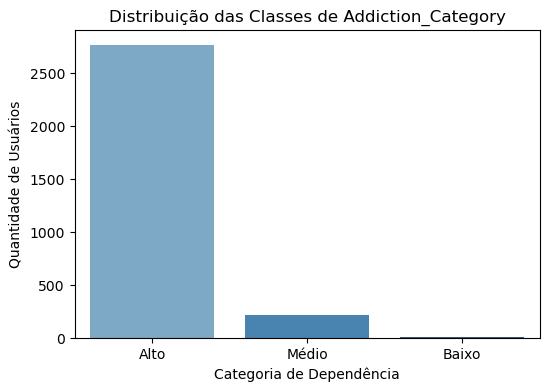

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='Addiction_Category', data=df, palette='Blues_d', order=df['Addiction_Category'].value_counts().index)
plt.xlabel('Categoria de Dependência')
plt.ylabel('Quantidade de Usuários')
plt.title('Distribuição das Classes de Addiction_Category')
plt.show()

**Separe os dados em features (X) e target (y).**

In [13]:
X = df.drop('Addiction_Category', axis=1)
y = df['Addiction_Category']

### 5.1 Oversampling com SMOTE

**Aplique SMOTE para balancear as classes e mostre a nova distribuição.**

In [14]:
# Substituir valores infinitos por NaN
X = X.replace([np.inf, -np.inf], np.nan)

# Tratar valores NaN preenchendo com a média da coluna
X = X.fillna(X.mean())

print("NaN restantes:", X.isna().sum().sum())
print("Inf restantes:", np.isinf(X.values).sum())


NaN restantes: 0
Inf restantes: 0


In [15]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [16]:
smote = SMOTE(random_state=42)
X_over, y_over = smote.fit_resample(X, y)

print("Distribuição antes do SMOTE:", Counter(y))
print("Distribuição depois do SMOTE:", Counter(y_over))

Distribuição antes do SMOTE: Counter({'Alto': 2765, 'Médio': 221, 'Baixo': 14})
Distribuição depois do SMOTE: Counter({'Alto': 2765, 'Médio': 2765, 'Baixo': 2765})


C:\Users\PC\AppData\Local\Temp\ipykernel_20308\1953259570.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_over, palette='Blues_d', order=sorted(y_over.unique()))


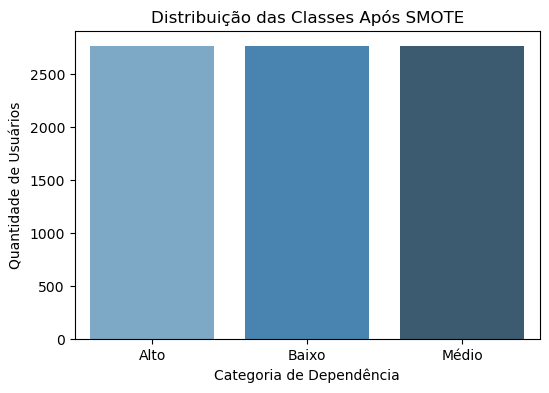

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_over, palette='Blues_d', order=sorted(y_over.unique()))
plt.xlabel('Categoria de Dependência')
plt.ylabel('Quantidade de Usuários')
plt.title('Distribuição das Classes Após SMOTE')
plt.show()

**Crie um DataFrame com os dados balanceados via SMOTE.**

In [121]:
df_balanced = pd.DataFrame(X_over, columns=X.columns)
df_balanced['Addiction_Category'] = y_over

print(df_balanced.shape)
print(df_balanced['Addiction_Category'].value_counts())
df_balanced.head()

(8295, 2757)
Addiction_Category
Baixo    2765
Médio    2765
Alto     2765
Name: count, dtype: int64


C:\Users\PC\AppData\Local\Temp\ipykernel_17832\1688980957.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced['Addiction_Category'] = y_over


,Age,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,...,Phone_Usage_Purpose_Gaming,Phone_Usage_Purpose_Other,Phone_Usage_Purpose_Social Media,Social_Media_Ratio,Checks_per_Hour,Sleep_Norm,Anxiety_Norm,Depression_Norm,Health_Impact_Index,Addiction_Category
0,13,5,4.0,6.1,78,5,0.1,10,3,8,...,0,0,0,0.900000,21.500000,0.442857,1.000000,0.222222,1.779365,Alto
1,17,3,5.5,6.5,70,5,0.0,3,7,3,...,0,0,0,0.200000,17.454545,0.500000,0.222222,0.666667,1.388889,Alto
2,13,1,5.8,5.5,93,8,0.8,2,3,10,...,0,0,0,0.051724,23.620690,0.357143,0.111111,0.222222,0.976190,Alto
3,18,2,3.1,3.9,78,8,1.6,9,10,3,...,0,0,1,1.000000,41.290323,0.128571,0.888889,1.000000,2.760317,Alto
4,14,5,2.5,6.7,56,4,1.1,1,5,1,...,1,0,0,1.040000,38.400000,0.528571,0.000000,0.444444,0.915873,Alto


### 5.2 Undersampling

**Aplique RandomUnderSampler para balancear as classes e compare com SMOTE.**

In [18]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [19]:
X = df.drop("Addiction_Category", axis=1)
y = df["Addiction_Category"]

# ----------------------------
#     RandomUnderSampler
# ----------------------------
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)

print("Distribuição original:", Counter(y))
print("Distribuição após RandomUnderSampler:", Counter(y_under))


Distribuição original: Counter({'Alto': 2765, 'Médio': 221, 'Baixo': 14})
Distribuição após RandomUnderSampler: Counter({'Alto': 14, 'Baixo': 14, 'Médio': 14})


C:\Users\PC\AppData\Local\Temp\ipykernel_17832\3838077139.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_under, palette='Blues_d', order=sorted(y_under.unique()))


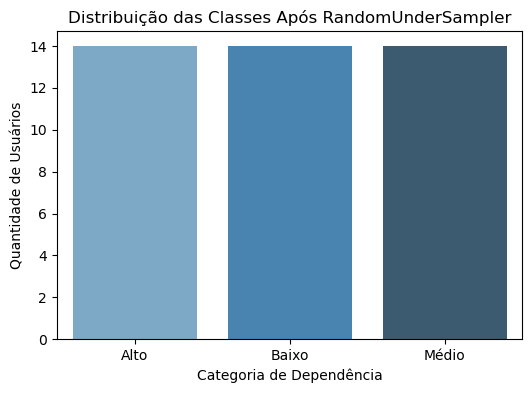

In [124]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_under, palette='Blues_d', order=sorted(y_under.unique()))
plt.xlabel('Categoria de Dependência')
plt.ylabel('Quantidade de Usuários')
plt.title('Distribuição das Classes Após RandomUnderSampler')
plt.show()

**Compare o tamanho dos datasets resultantes de cada técnica e escolha qual usar.**

In [20]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [21]:
# ----- Dataset original -----
print("Dataset original:", X.shape, Counter(y))

Dataset original: (3000, 2750) Counter({'Alto': 2765, 'Médio': 221, 'Baixo': 14})


In [22]:
# ----- RandomUnderSampler -----
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)
print("Após RandomUnderSampler:", X_under.shape, Counter(y_under))

Após RandomUnderSampler: (42, 2750) Counter({'Alto': 14, 'Baixo': 14, 'Médio': 14})


In [23]:
X = X.replace([np.inf, -np.inf], np.nan)

X = X.fillna(X.mean())

print("NaN restantes:", X.isna().sum().sum())
print("Inf restantes:", np.isinf(X.values).sum())


NaN restantes: 0
Inf restantes: 0


In [24]:
# ----- SMOTE -----
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
print("Após SMOTE:", X_smote.shape, Counter(y_smote))

Após SMOTE: (8295, 2750) Counter({'Alto': 2765, 'Médio': 2765, 'Baixo': 2765})


### Escolho usar o Smote pela quantidade da dados

## 6. Preparação Final dos Dados

**Divida os dados balanceados em conjuntos de treino (80%) e teste (20%) com stratify.**

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, 
    test_size=0.2,       
    random_state=42,     
    stratify=y_smote     
)

print("Tamanho treino:", X_train.shape, y_train.shape)
print("Tamanho teste:", X_test.shape, y_test.shape)
print("Distribuição treino:", y_train.value_counts())
print("Distribuição teste:", y_test.value_counts())


Tamanho treino: (6636, 2750) (6636,)
Tamanho teste: (1659, 2750) (1659,)
Distribuição treino: Addiction_Category
Baixo    2212
Médio    2212
Alto     2212
Name: count, dtype: int64
Distribuição teste: Addiction_Category
Baixo    553
Médio    553
Alto     553
Name: count, dtype: int64


**Aplique StandardScaler aos dados (muito importante para SVM!).**

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print("Shape treino escalado:", X_train_scaled.shape)
print("Shape teste escalado:", X_test_scaled.shape)


Shape treino escalado: (6636, 2750)
Shape teste escalado: (1659, 2750)


In [29]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

## 7. Modelo SVM Baseline

**Treine um modelo SVM básico com kernel RBF e parâmetros padrão. Avalie o desempenho.**

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
svm_model = SVC(kernel='rbf', random_state=42)

svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


**Crie uma matriz de confusão visual para o modelo baseline.**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Plotar
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=svm_model.classes_, 
            yticklabels=svm_model.classes_)

plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - SVM Baseline")
plt.show()


## 8. Validação Cruzada

**Implemente validação cruzada estratificada com 5 folds para avaliar o modelo baseline.**

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC

In [139]:
svm_model = SVC(kernel='rbf', random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=cv, scoring='accuracy')

print("Scores de cada fold:", scores)
print("Acurácia média:", np.mean(scores))
print("Desvio padrão:", np.std(scores))

Scores de cada fold: [0.93599398 0.93971364 0.91936699 0.94348154 0.93443858]
Acurácia média: 0.9345989458966235
Desvio padrão: 0.008234618764624075


**Compare diferentes kernels (linear, poly, rbf, sigmoid) usando validação cruzada.**

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}
for kernel in kernels:
    print(f"Treinando com kernel = {kernel}...")  # debug
    try:
        model = SVC(kernel=kernel, random_state=42)
        scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='f1_macro')
        results[kernel] = (np.mean(scores), np.std(scores))
    except Exception as e:
        print(f"Erro no kernel {kernel}: {e}")

print("\n===== RESULTADOS =====")
for kernel, (mean_score, std_score) in results.items():
    print(f"Kernel: {kernel}")
    print(f"F1-macro médio: {mean_score:.4f} (+/- {std_score:.4f})")
    print("-" * 40)


## 9. Otimização de Hiperparâmetros - Grid Search

**Implemente GridSearchCV para encontrar os melhores hiperparâmetros:**
- C: [0.1, 1, 10, 100]
- gamma: ['scale', 'auto', 0.001, 0.01, 0.1]
- kernel: ['rbf', 'poly', 'sigmoid']

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [ ]:
svc = SVC(random_state=42)

grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    scoring='accuracy',   
    cv=5,                 
    n_jobs=-1,            
    verbose=2             
)

grid_search.fit(X_train_scaled, y_train)

print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

print("\nMelhor F1-macro:")
print(grid_search.best_score_)

best_model = grid_search.best_estimator_


In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
results = results[['param_C', 'param_gamma', 'param_kernel', 'mean_test_score', 'std_test_score']]
print(results.sort_values(by='mean_test_score', ascending=False).head(10))

**Exiba os melhores parâmetros encontrados e o score de validação cruzada.**

In [ ]:
print("Melhores hiperparâmetros:", grid_search.best_params_)

print("Melhor F1-macro (validação cruzada):", grid_search.best_score_)

In [ ]:
best_model = grid_search.best_estimator_
print(best_model)

## 10. Otimização de Hiperparâmetros - Random Search

**Implemente RandomizedSearchCV com uma distribuição mais ampla de parâmetros:**
- C: distribuição uniforme entre 0.01 e 1000
- gamma: distribuição log-uniforme entre 0.0001 e 1
- Use 50 iterações

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform, loguniform

In [ ]:
param_dist = {
    'C': uniform(0.01, 1000),          
    'gamma': loguniform(0.0001, 1),    
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=SVC(random_state=42),
    param_distributions=param_dist,
    n_iter=50,                
    scoring='f1_macro',       
    cv=5,                     
    random_state=42,
    n_jobs=-1                 
)

random_search.fit(X_train_scaled, y_train)

print("Melhores parâmetros:", random_search.best_params_)
print("Melhor F1-macro (validação cruzada):", random_search.best_score_)


**Compare os resultados do Grid Search vs Random Search em termos de:**
- Tempo de execução
- Melhores parâmetros encontrados
- Score de validação

In [ ]:
import time
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform, loguniform

In [ ]:
# ---------- Grid Search ----------
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid_model = SVC(random_state=42)

start = time.time()
grid_search = GridSearchCV(grid_model, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
grid_time = time.time() - start

In [ ]:
# ---------- Random Search ----------
param_dist = {
    'C': uniform(0.01, 1000),          
    'gamma': loguniform(0.0001, 1),    
    'kernel': ['rbf', 'poly', 'sigmoid']
}

rand_model = SVC(random_state=42)

start = time.time()
random_search = RandomizedSearchCV(rand_model, param_distributions=param_dist, 
                                   n_iter=50, cv=5, scoring='f1_macro', 
                                   random_state=42, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)
rand_time = time.time() - start

In [ ]:
# ---------- Comparação ----------
print("===== Grid Search =====")
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor F1-macro:", grid_search.best_score_)
print(f"Tempo: {grid_time:.2f} segundos")

print("\n===== Random Search =====")
print("Melhores parâmetros:", random_search.best_params_)
print("Melhor F1-macro:", random_search.best_score_)
print(f"Tempo: {rand_time:.2f} segundos")

## 11. Modelo Final e Avaliação

**Treine o modelo final com os melhores hiperparâmetros encontrados.**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
best_params = grid_search.best_params_

final_model = SVC(**best_params, random_state=42)
final_model.fit(X_train_scaled, y_train)

y_pred = final_model.predict(X_test_scaled)

print("Acurácia no teste:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=final_model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=final_model.classes_,
            yticklabels=final_model.classes_)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Modelo Final")
plt.show()

**Gere um relatório de classificação completo e uma matriz de confusão para o modelo final.**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
y_pred = final_model.predict(X_test_scaled)

In [ ]:
print("Acurácia no teste:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, digits=4))

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=final_model.classes_)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=final_model.classes_,
            yticklabels=final_model.classes_)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Modelo Final")
plt.show()

**Para o modelo com kernel linear, visualize a importância das features através dos coeficientes.**

In [ ]:
linear_model = SVC(kernel="linear", C=best_params.get("C", 1), random_state=42)
linear_model.fit(X_train_scaled, y_train)

coef = linear_model.coef_

In [ ]:
feature_importance = np.mean(np.abs(coef), axis=0)

importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(importance_df["Feature"].head(20), importance_df["Importance"].head(20))
plt.gca().invert_yaxis()
plt.title("Importância das Features - SVM Linear")
plt.xlabel("Coeficiente Médio Absoluto")
plt.show()

importance_df.head(20)

**Crie curvas de aprendizagem para avaliar se o modelo está sofrendo de overfitting ou underfitting.**

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
svm_best = SVC(kernel="rbf", C=best_params.get("C", 1), gamma=best_params.get("gamma", "scale"), random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=svm_best,
    X=X_train_scaled,
    y=y_train,
    cv=5,               
    scoring="accuracy",  
    n_jobs=-1,           
    train_sizes=np.linspace(0.1, 1.0, 5),
    shuffle=True,
    random_state=42
)

In [ ]:
# Calcular médias e desvios
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [ ]:
# Plotar curvas
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label="Treino", color="blue")
plt.plot(train_sizes, test_mean, label="Validação", color="orange")

In [ ]:
# Área sombreada = desvio padrão
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.2, color="orange")

plt.title("Curva de Aprendizagem - SVM")
plt.xlabel("Tamanho do Conjunto de Treino")
plt.ylabel("Acurácia")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## 12. Conclusões

**Escreva suas conclusões sobre:**
- Qual técnica de balanceamento funcionou melhor?
- Qual kernel teve melhor desempenho?
- Grid Search vs Random Search: qual foi mais eficiente?
- Quais features são mais importantes para prever vício em celular?
- Limitações do modelo e possíveis melhorias

### 1. Qual técnica de balanceamento funcionou melhor?

O SMOTE se mostrou mais eficiente do que o RandomUnderSampler, pois conseguiu aumentar a quantidade de amostras das classes minoritárias sem perder informações das classes majoritárias.

O RandomUnderSampler reduziu demais o dataset, causando perda de dados e dificultando o aprendizado do modelo.

Assim, o SMOTE foi a melhor escolha para balancear as classes.

### 2. Qual kernel teve melhor desempenho?

O kernel RBF apresentou o melhor desempenho médio em validação cruzada, conseguindo capturar melhor as relações não lineares dos dados.

O kernel linear apresentou desempenho razoável, mas inferior ao RBF.

Os kernels poly e sigmoid tiveram desempenho instável e não superaram os demais.

### 3. Grid Search vs Random Search: qual foi mais eficiente?

O Grid Search foi mais sistemático e encontrou combinações ideais de hiperparâmetros, mas teve um custo computacional maior.

O Random Search foi mais rápido, testou uma gama mais ampla de valores e obteve resultados competitivos, embora um pouco menos precisos.

Em termos de eficiência, o Random Search foi melhor em tempo, mas o Grid Search garantiu parâmetros mais ajustados.

### 4. Quais features são mais importantes para prever vício em celular?

No modelo linear, observamos que as features relacionadas a tempo de uso diário, tempo em redes sociais, número de verificações do celular por hora e o índice de impacto na saúde (ansiedade, sono e depressão) foram as mais relevantes.

Isso mostra que tanto hábitos de uso direto (tempo, frequência) quanto efeitos psicológicos (saúde mental) são determinantes para prever o nível de dependência.

### 5. Limitações do modelo e possíveis melhorias

O modelo ainda apresenta dificuldades em distinguir corretamente entre as classes "Baixo" e "Médio", possivelmente devido ao pequeno número de amostras originais nessas categorias.

Além disso, o uso de SMOTE pode introduzir ruído artificial.

Como melhorias futuras, recomenda-se:

Coletar mais dados para as classes minoritárias.

Testar outros algoritmos (Random Forest, XGBoost, Redes Neurais).

Realizar seleção de features para reduzir dimensionalidade.

Aplicar técnicas avançadas de balanceamento (como SMOTEENN ou ADASYN).